# THE SPARKS FOUNDATION

# Data Science & Business Analytics Internship (GRIP JANUARY 2023)

Task 1 : Prediction using Supervised ML

Done by : Yeturi Venkatesh

Project : Prediction of score of a student based on number of hours of study per day

# Import the required libraries

In [94]:
import numpy as np                                        # for numerical computations
import pandas as np                                       # for data organizing
import matplotlib.pyplot as plt                           # for visualization
from sklearn.linear_model import LinearRegression         # for linear regression
from sklearn.model_selection import train_test_split      # to divide the dataset
from sklearn.metrics import mean_absolute_error           # to measure the accuracy and error

In [121]:
# import the data into dataframe
df = pd.read_csv(r"C:\Users\Venkatesh Yeturi\Downloads\student_scores - student_scores.csv")

# Data Preprocessing

In [138]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [139]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# Data visualization 

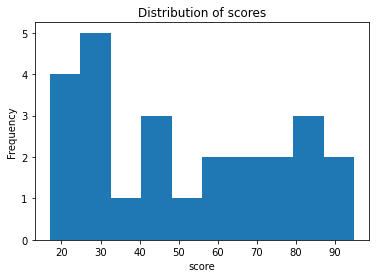

In [142]:
# Histogram to observe the distribution of the scores
plt.title('Distribution of scores')
plt.xlabel('score')
plt.ylabel('Frequency')
plt.hist(df['Scores']);

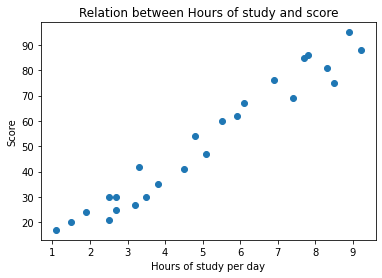

In [143]:
# to observe the correlation between score and hours of study per day
plt.title('Relation between Hours of study and score')
plt.xlabel('Hours of study per day')
plt.ylabel('Score')
plt.scatter(df['Hours'],df['Scores'])

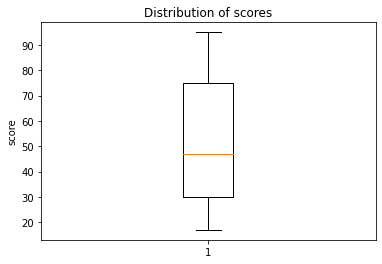

In [144]:
# to observe the the distribution in quantile wise
plt.title('Distribution of scores')
plt.ylabel('score')
plt.boxplot(df['Scores']);

In [145]:
# Dividing the dataset into features(input) and labels(output)
features = ['Hours']
X = df[features]
y = df['Scores']

In [57]:
# Dividing the data into training and testing data (75% data used for training and 25% for testing)
X_train,X_test, y_train, y_test = train_test_split(X,y,shuffle=True,test_size=0.25)

In [68]:
X_train.head()

,Hours
8,8.3
22,3.8
10,7.7
20,2.7
1,5.1


In [69]:
X_test.head()

,Hours
18,6.1
6,9.2
15,8.9
5,1.5
4,3.5


In [179]:
type(X_test)

pandas.core.frame.DataFrame

In [73]:
print('X_train shape : ',X_train.shape)
print('x_test shape : ', X_test.shape)

X_train shape :  (18, 1)
x_test shape :  (7, 1)


In [81]:
y_train.head()

8     81
22    35
10    85
20    30
1     47
Name: Scores, dtype: int64

In [77]:
y_test.head()

18    67
6     88
15    95
5     20
4     30
Name: Scores, dtype: int64

In [78]:
print(y_train.shape)
print(y_test.shape)

(18,)
(7,)


# Baseline model 

In [146]:
# this model is the basic assumption and prediction of labels for testing data
y_pred_baseline = y_train.mean()

In [147]:
y_pred_baseline = [y_pred_baseline]*len(y_test)

In [148]:
X_test.values.shape

(7, 1)

In [149]:
y_test.shape

(7,)

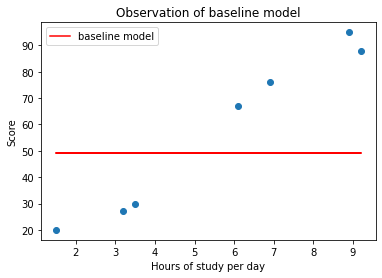

In [150]:
# observing the predicted values with respect to actual values y_test.
plt.xlabel('Hours of study per day')
plt.ylabel('Score')
plt.title('Observation of baseline model')
plt.scatter(X_test.values,y_test)
plt.plot(X_test.values,y_pred_baseline,color='red',label='baseline model')
plt.legend()
plt.show()

In [151]:
# calculating the error with baseline model
mean_absolute_error(y_test,y_pred_baseline)

28.555555555555554

# Linear Regression model

In [153]:
#  import the inbuilt model from sklearn
model = LinearRegression()

In [154]:
# training the model
model.fit(X_train,y_train)

LinearRegression()

In [155]:
# prediction of output from model
y_pred = model.predict(X_test)

In [156]:
y_pred.shape

(7,)

In [157]:
# finding the slope and intercepts of linear regression line 
model.coef_

array([9.44106228])

In [158]:
type(model.coef_)

numpy.ndarray

In [159]:
slope = model.coef_[0]
slope

9.44106228031887

In [160]:
model.intercept_

4.003813549587619

In [161]:
type(model.intercept_)

numpy.float64

In [162]:
intercept = model.intercept_
intercept

4.003813549587619

In [163]:
y_pred_line = slope*X_test.values+intercept
y_pred_line

array([[61.59429346],
       [90.86158653],
       [88.02926784],
       [18.16540697],
       [37.04753153],
       [69.14714328],
       [34.21521285]])

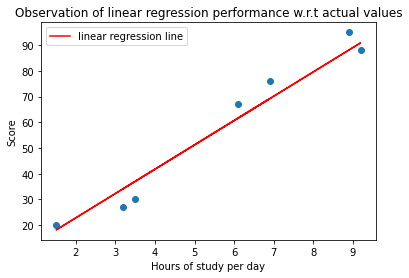

In [165]:
# Observing linear regression w.r.t actual values i.e y_test
plt.title('Observation of linear regression performance w.r.t actual values')
plt.xlabel('Hours of study per day')
plt.ylabel('Score')
plt.scatter(X_test.values, y_test)
plt.plot(X_test.values, y_pred_line,label='linear regression line',color='red');
plt.legend()
plt.show()

In [101]:
# calculating the error with linear regression model
mean_absolute_error(y_pred,y_test)

5.4554599068601215

# Observation : The mean absolute error is decreased from baseline model to linear regression model 

In [183]:
# predicting the score for 9.25 hours per day 
newDataFrame = pd.DataFrame([])
newDataFrame['Hours']=[9.25]
y_required = model.predict(newDataFrame)
y_required

array([91.33363964])

In [184]:
# or by line equation : 
x = 9.25
y_req = slope*x + intercept
y_req

91.33363964253718

# Done!